Основы работы с conda

conda — это менеджер пакетов и окружений, который часто используется в Data Science и MLOps для управления зависимостями и изоляции проектов.

Если у тебя еще не установлен conda, ты можешь установить его, скачав Miniconda #[https://docs.conda.io/en/latest/miniconda.html] или Anaconda [https://www.anaconda.com/download].

## Основные команды conda
### 1. Создание нового окружения:
conda create --name test_env python=3.10
### 2. Активация окружения:
conda activate myenv
### 3. Деактивация окружения:
conda deactivate
### 4. Установка пакетов:
conda install numpy pandas
### 5. Удаление пакетов:
conda remove numpy
### 6. Экспорт окружения в файл:
conda env export > environment.yml

In [23]:
# !uname -a. Аналог этой функции в Windows:

import platform
print(platform.system())
print(platform.release())

Windows
11


In [41]:
#Пример получения списка установленный пакетов в системе и запись в файл list_libs.yml

!conda list > list_libs.yml

In [51]:
#Вывод списка библиотек из файла начинающихся на "n"
# !cat list_libs.yml | grep '^n'. Ниже аналог для Windows:

!type list_libs.yml | findstr "^n"

navigator-updater         0.5.1           py312haa95532_0  
nbclient                  0.8.0           py312haa95532_0  
nbconvert                 7.16.4          py312haa95532_0  
nbformat                  5.10.4          py312haa95532_0  
nest-asyncio              1.6.0           py312haa95532_0  
networkx                  3.3             py312haa95532_0  
notebook                  7.3.2           py312haa95532_0  
notebook-shim             0.2.3           py312haa95532_0  
numexpr                   2.8.7           py312h96b7d27_0  
numpy                     1.26.4          py312hfd52020_0  
numpy-base                1.26.4          py312h4dde369_0  


## Основные команды pip

In [53]:
!pip list 

Package                    Version
-------------------------- ----------------
aext-assistant             4.0.15
aext-assistant-server      4.0.15
aext-core                  4.0.15
aext-core-server           4.0.15
aext-panels                4.0.15
aext-panels-server         4.0.15
aext-share-notebook        4.0.15
aext-share-notebook-server 4.0.15
aext-shared                4.0.15
aiohappyeyeballs           2.4.0
aiohttp                    3.10.5
aiosignal                  1.2.0
alembic                    1.13.3
anaconda-anon-usage        0.4.4
anaconda-catalogs          0.2.0
anaconda-cli-base          0.5.2
anaconda-client            1.13.0
anaconda-cloud-auth        0.5.1
anaconda-navigator         2.6.3
anaconda-project           0.11.1
annotated-types            0.6.0
anyio                      4.2.0
archspec                   0.2.3
argon2-cffi                21.3.0
argon2-cffi-bindings       21.2.0
asttokens                  3.0.0
async-lru                  2.0.4
attrs          

In [45]:
!pip show torch

Name: torch
Version: 2.5.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\anaconda3\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: torchaudio, torchvision


In [59]:
# !lscpu
import cpuinfo
cpu_info = cpuinfo.get_cpu_info()
print(f"Название процессора: {cpu_info['brand_raw']}")
print(f"Количество логических ядер: {cpu_info['count']}")

Название процессора: AMD Ryzen 5 7535HS with Radeon Graphics
Количество логических ядер: 12


### Библиотека Pytorch
PyTorch — это библиотека для машинного обучения, предназначенная для построения архитектур нейронных сетей и обучения.

In [61]:
import torch

In [63]:
a = torch.tensor([1.,2,3])
b = torch.tensor([3,-2,1])
c = a + b
c

tensor([4., 0., 4.])

In [65]:
torch.cuda.is_available()

True

In [ ]:
a = torch.tensor([1.,2,3], requires_grad=True)
b = a + 2
c = a * a * 2
c = c.mean()
c.backward()  # Вычисляет градиенты
print(a.grad)

### Пример обучения нейронной сети для изображений

In [113]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

#Пример построения графа нейросети с полносвязнными слоями
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, C, H, W) -> (B, embed_dim, H/patch_size, W/patch_size)
        x = x.flatten(2)  # (B, embed_dim, H/patch_size * W/patch_size)
        x = x.transpose(1, 2)  # (B, H/patch_size * W/patch_size, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)
        self.out_linear = nn.Linear(embed_dim, embed_dim)

    def attention(self, query, key, value, mask=None):
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn = F.softmax(scores, dim=-1)
        context = torch.matmul(attn, value)
        return context, attn

    def forward(self, x):
        batch_size = x.size(0)

        query = self.query_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.key_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.value_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        context, _ = self.attention(query, key, value)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)
        return self.out_linear(context)

class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(embed_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.linear2(self.dropout(F.relu(self.linear1(x))))

class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super(TransformerLayer, self).__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.ff = FeedForward(embed_dim, hidden_dim, dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.attn(x)
        out1 = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(out1)
        out2 = self.norm2(out1 + self.dropout(ff_output))
        return out2

class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.layers = nn.ModuleList([
            TransformerLayer(embed_dim, num_heads, hidden_dim, dropout)
            for _ in range(num_layers)
        ])
        self.linear = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        for layer in self.layers:
            x = layer(x)
        x = x.mean(dim=1)  # Усреднение по последовательности
        return self.linear(x)

# Пример использования
img_size = 28
patch_size = 8
in_channels = 1  # Для черно-белых изображений
embed_dim = 14
num_heads = 2
hidden_dim = 6
num_layers = 1
num_classes = 10  # Например, для классификации цифр от 0 до 9
dropout = 0.1

model = VisionTransformer(img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout)

# Пример входных данных
x = torch.rand(1, in_channels, img_size, img_size)  # Батч из 32 изображений размером 28x28

output = model(x)
print(output.shape)  # Выходной тензор

torch.Size([1, 10])


In [117]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = MNIST('/data', train=True, download=True,
                   transform=transform)
dataset2 = MNIST('/data', train=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,)
test_loader = torch.utils.data.DataLoader(dataset2)

In [119]:
inputs, labels = next(iter(train_loader)) 
print(inputs.shape, labels.shape)

torch.Size([1, 1, 28, 28]) torch.Size([1])


In [121]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [123]:
for epoch in tqdm(range(15)):  # Количество эпох
    correct = 0
    for data in test_loader:  # Итерация по данным
        inputs, labels = data
        optimizer.zero_grad()  # Обнуление градиентов
        outputs = model(inputs)  # Прямой проход
        loss = criterion(outputs, labels)  # Вычисление потерь
        
        loss.backward()  # Обратный проход
        optimizer.step()  # Обновление весов
        pred = outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels).item()
    print('Accuracy: {:.0f}%)\n'.format(correct/len(test_loader)*100))
print('done')

  7%|▋         | 1/15 [00:37<08:41, 37.27s/it]

Accuracy: 36%)



 13%|█▎        | 2/15 [01:14<08:01, 37.01s/it]

Accuracy: 33%)



 20%|██        | 3/15 [01:51<07:23, 36.96s/it]

Accuracy: 35%)



 27%|██▋       | 4/15 [02:29<06:52, 37.48s/it]

Accuracy: 36%)



 33%|███▎      | 5/15 [03:07<06:18, 37.88s/it]

Accuracy: 38%)



 40%|████      | 6/15 [03:45<05:40, 37.84s/it]

Accuracy: 38%)



 47%|████▋     | 7/15 [04:22<05:01, 37.67s/it]

Accuracy: 40%)



 53%|█████▎    | 8/15 [05:00<04:23, 37.64s/it]

Accuracy: 40%)



 60%|██████    | 9/15 [05:38<03:46, 37.71s/it]

Accuracy: 42%)



 67%|██████▋   | 10/15 [06:16<03:08, 37.76s/it]

Accuracy: 38%)



 73%|███████▎  | 11/15 [06:54<02:31, 37.83s/it]

Accuracy: 43%)



 80%|████████  | 12/15 [07:32<01:53, 37.85s/it]

Accuracy: 44%)



 87%|████████▋ | 13/15 [08:09<01:15, 37.80s/it]

Accuracy: 45%)



 93%|█████████▎| 14/15 [08:47<00:37, 37.66s/it]

Accuracy: 47%)



100%|██████████| 15/15 [09:24<00:00, 37.65s/it]

Accuracy: 48%)

done


In [125]:
number = 100
test_img, test_label = test_loader.dataset[number]
test_img = test_img.unsqueeze(0)
torch.argmax(model(test_img)), test_label

(tensor(6), 6)

In [127]:
#посмотрим как модель предсказывает цифры
for number in range(15):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    print(f"Pred = {torch.argmax(model(test_img))}, Label = {test_label}")

Pred = 7, Label = 7
Pred = 6, Label = 2
Pred = 1, Label = 1
Pred = 3, Label = 0
Pred = 7, Label = 4
Pred = 1, Label = 1
Pred = 3, Label = 4
Pred = 9, Label = 9
Pred = 0, Label = 5
Pred = 8, Label = 9
Pred = 3, Label = 0
Pred = 6, Label = 6
Pred = 9, Label = 9
Pred = 1, Label = 0
Pred = 1, Label = 1


## Визуализация прогнозов модели

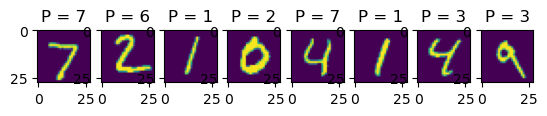

In [129]:
fig, ax = plt.subplots(1,8)
for number in range(8):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    pred = torch.argmax(model(test_img))
    ax[number].imshow(test_img[0][0].numpy())
    ax[number].set_title(f"P = {pred}")

### Обучение модели линеной регрессии

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [132]:
#В качестве набора данных используется история продаж автомобилей. Для целевой переменной используем Price(euro) - стоимость авто

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [134]:

cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)
# Анализ и очистка данных
# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
# Разделение данных на признаки и целевую переменную


# Предварительная обработка категориальных данных
# Порядковое кодирование. Обучение, трансформация и упаковка в df

ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns=cat_columns)
df[cat_columns] = df_ordinal[cat_columns]

In [135]:
X,y = df.drop(columns = ['Price(euro)']), df['Price(euro)']
scaler = StandardScaler()
power_trans = PowerTransformer()
X_scale = scaler.fit_transform(X.values)

Y_scale = power_trans.fit_transform(y.values.reshape(-1,1))

In [136]:
features_names = X.columns.to_list()

In [137]:
# разбиваем на тестовую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_scale, Y_scale,
                                                  test_size=0.3,
                                                  random_state=42)

### Обучение линейной регрессии

In [139]:
model = SGDRegressor()
model.fit(X_train, y_train)
r = model.score(X_train, y_train)
print('R^2 = ', r) # Метрика R^2

R^2 =  0.7091451701937715


C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Оценим ошибку модели

In [149]:
y_pred = model.predict(X_val)
y_price = power_trans.inverse_transform(y_pred.reshape(-1,1))
print("Средняя ошибка прогноза модели =", root_mean_squared_error(power_trans.inverse_transform(y_val.reshape(-1,1)), y_price))

Средняя ошибка прогноза модели = 5993.540332848604


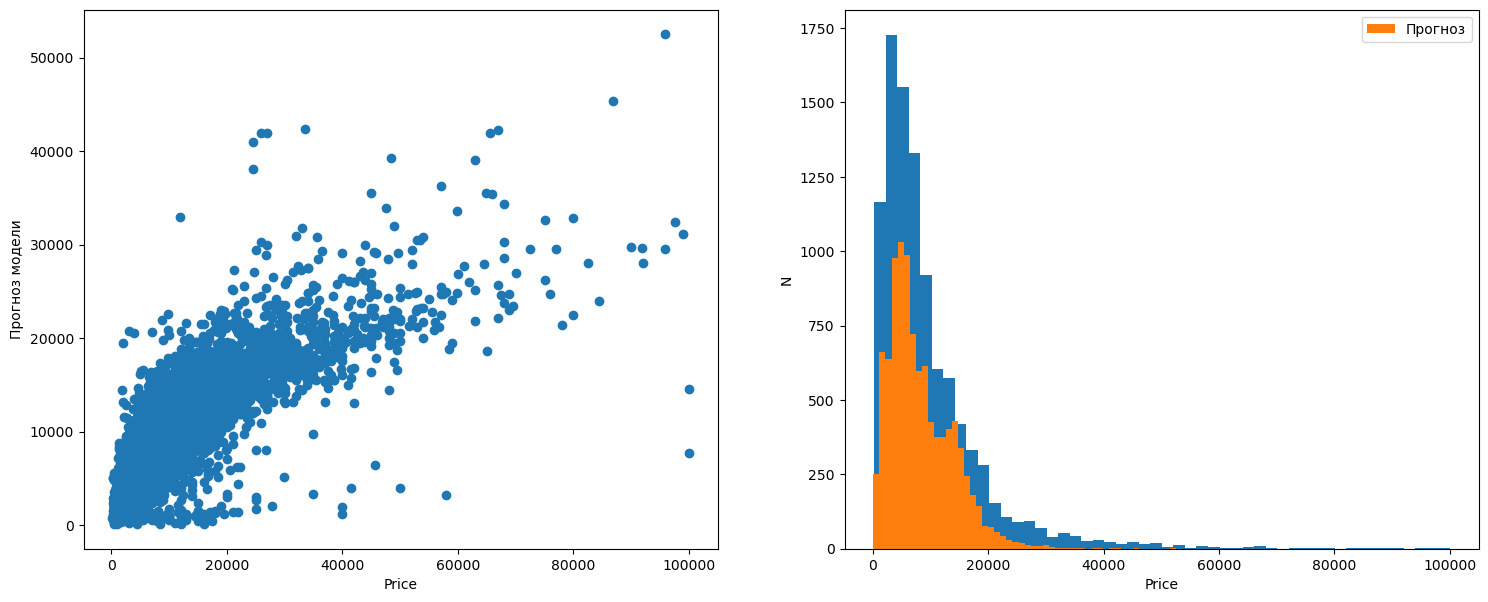

In [151]:
y = power_trans.inverse_transform(y_val.reshape(-1,1))
fig,ax = plt.subplots(1,2, dpi = 100, figsize=(18,7))
ax[0].scatter( y, y_price,)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist( y,50)
ax[1].hist( y_price,50, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')
ax[1].legend()

In [153]:
##Сохраним модель
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)

### Задание. Лабораторная работа №1

1.Выполнить установку и настройку необходимых библитек для работы с ML. Выполнить ячейки ноутбука (5 баллов)

2.Произвести обучение одной модели (Нейронной сети или линейнойной регрессии) (5 баллов)

За обучение модели на своих данных +5 баллов 

### Реквизиты автора:

### Рябов Михаил Сергеевич, АТ-04


### 1. Установка необходимых библиотек: numpy, pandas, pytorch, scikit-learn

In [292]:
import pandas as pd
import torch
import torchvision
import sklearn
import numpy as np

### 2. Обучение одной модели. Линейная регрессия.

In [48]:
# Датасет: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

import torch
import torchvision
import torch.nn as nn
from torch.optim import SGD

import pandas as pd

from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

device = torch.device("cuda:0")

In [90]:
data = pd.read_csv('Student_Performance.csv')

# Предобработка данных
data['Extracurricular Activities'] = data['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

# Разделение данных на признаки ицелевую переменную
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
          'Sleep Hours', 'Sample Question Papers Practiced']].values
y = data['Performance Index'].values

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [92]:
train_data = TensorDataset(X, y)
train_data, val_data, test_data = random_split(train_data, [0.7, 0.2, 0.1])
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [94]:
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)
        # self.linear_2 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = self.linear(x)
        # x = self.linear_2(x)
        return x

input_size = X.shape[1]
model = LinearRegression(input_size).to(device)

In [96]:
loss_model = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [98]:
EPOCHS = 50

# Обучение на тренировочных данных
for epoch in range(EPOCHS):
    model.train()
    train_loss_data = []
    train_loop = tqdm(train_loader, leave=False)
    
    for batch_X, batch_y in train_loop:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        pred = model(batch_X)
        loss = loss_model(pred, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss_data.append(loss.item())
    
        mean_train_loss = sum(train_loss_data) / len(train_loss_data)
        train_loop.set_description(f"Epochs [{epoch + 1}/{EPOCHS}], Loss: {mean_train_loss:0.4f}")

# Оценка модели на тестовых данных
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    test_loss_data = []
    
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        pred = model(batch_X)
        loss = loss_model(pred, batch_y)
        
        test_loss_data.append(loss.item())
        all_preds.append(pred.cpu())
        all_targets.append(batch_y.cpu())
    
    mean_test_loss = sum(test_loss_data) / len(test_loss_data)
    print(f"\nTest Loss: {mean_test_loss:0.4f}")
            
        


Test Loss: 4.2429


In [100]:
with torch.no_grad():
    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    
    # Вычисляем R²
    r2 = r2_score(all_targets, all_preds)
    print(f"R^2: {r2:0.4f}")

    # Пример предсказания для одного элемента
    sample = test_data[0][0].to(device)
    prediction = model(sample)
    print(f"Предсказанное значение: {prediction.item():0.4f}. Истинное значение: {test_data[0][1].item()}")

R^2: 0.9889
Предсказанное значение: 54.9805. Истинное значение: 52.0
